# Manifold analysis example

Example of manifold analysis in Figure 5d,e and
Supplementary figure 5e-h.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Here we load the PC linear model data (Supplementary figure 3c,d)
mf_data = pd.read_excel('../data/SupplementaryFigure3.xlsx',
                       sheet_name='Figure S3b,c,d,f',
                       usecols='A:HY',
                       skiprows=2,
                       nrows=502)

pc_data = pd.read_excel('../data/SupplementaryFigure3.xlsx',
                       sheet_name='Figure S3b,c,d,f',
                       usecols='HZ:TP',
                       skiprows=2,
                       nrows=502)



In [3]:
import cbmanifold
from cbmanifold.linear_model import LinearModel

def data_to_LinearModel(data, label):
    _, n = data.shape
    n = (n - 1) // 2

    scale = 1e3  # kHz -> Hz

    rate = data.iloc[:, 0:n].values.T * scale
    drate = data.iloc[:, n : 2 * n].values.T * scale
    v0 = data.iloc[:, 2 * n].unique()[0]
    n_params = 1
    lm = LinearModel()
    lm.rate = rate
    lm.drate = drate
    lm.dim = n
    lm.n_params = n_params
    lm.z0 = [v0]
    lm.label = label
    lm.is_dim_reduced = False

    return lm


lm_mf = data_to_LinearModel(mf_data, "mossy fiber")
lm_pc = data_to_LinearModel(pc_data, "Purkinje cell")

figsize: [6. 5.]


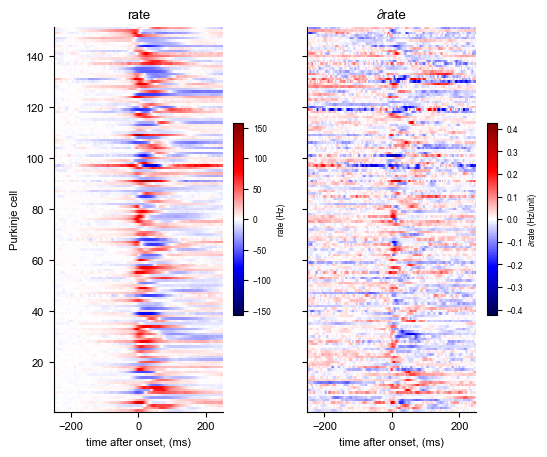

In [17]:
_, _ = cbmanifold.plot.plot_linear_model(lm_pc)

Dimensions: 1, Variance explained: 51.04384881006197
Dimensions: 2, Variance explained: 76.07985014983356
Dimensions: 3, Variance explained: 85.97231371969616
Dimensions: 4, Variance explained: 92.25990202100004
Dimensions: 5, Variance explained: 94.64670779103892
Dimensions to be reduced: 4


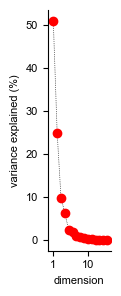

In [5]:
from cbmanifold.decomposition import pmPCA

dd, p, v = pmPCA(lm_pc.rate)
var_explained = dd/np.sum(dd)*1e2;
var_explained_cumsum = np.cumsum(var_explained);
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained_cumsum[i]}')

nmode = np.where(var_explained_cumsum > 87.5)[0][0]+1
print(f'Dimensions to be reduced: {nmode}')

_ = cbmanifold.plot.plot_var_explained(var_explained)


In [6]:
lmr = cbmanifold.decomposition.reduce_dimensionality(lm_pc, 2)

dims_to_flip_sign = [1]

for i in dims_to_flip_sign:
    lmr.p[i,:] = -lmr.p[i,:]
    lmr.dp[i,:] = -lmr.dp[i,:]


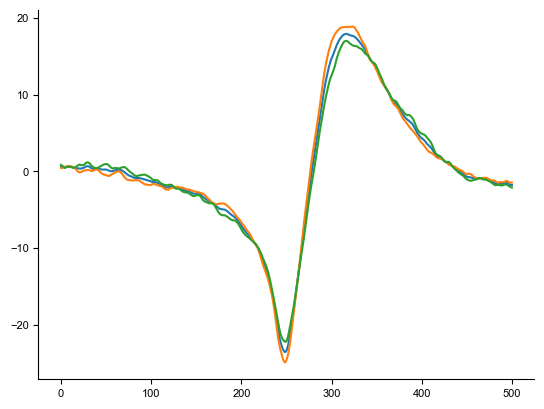

In [7]:
i = 1
plt.plot(0*lmr.dp[i,:]+lmr.p[i,:])
plt.plot(70*lmr.dp[i,:]+lmr.p[i,:])
plt.plot(-70*lmr.dp[i,:]+lmr.p[i,:])


(-30.0, 30.0)

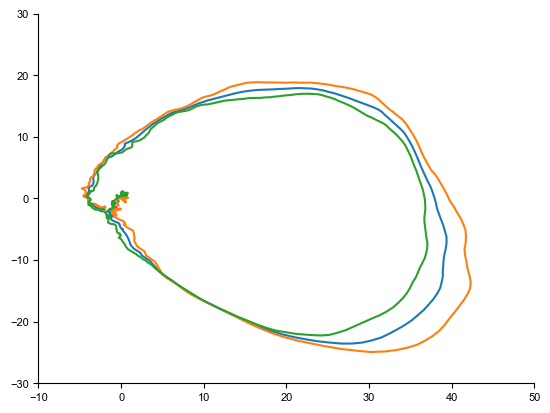

In [8]:
i1, i2 = 0, 1
plt.plot(0*lmr.dp[i1,:]+lmr.p[i1,:], 0*lmr.dp[i2,:]+lmr.p[i2,:])
plt.plot(70*lmr.dp[i1,:]+lmr.p[i1,:], 70*lmr.dp[i2,:]+lmr.p[i2,:])
plt.plot(-70*lmr.dp[i1,:]+lmr.p[i1,:], -70*lmr.dp[i2,:]+lmr.p[i2,:])
plt.xlim([-10, 50])
plt.ylim([-30, 30])


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dim',
 'drate',
 'is_dim_reduced',
 'label',
 'n_params',
 'rate',
 'z0']